In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the Excel file


In [10]:
import numpy as np
file_path = 'credit_score_dataset.xlsx'
df = pd.read_excel(file_path)

# Handle missing values


In [11]:
df.fillna(df.mean(), inplace=True)

In [12]:
df.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [13]:
X = df.drop(columns=['TARGET', 'ID'])
y = df['TARGET']

In [14]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2995    0
2996    0
2997    0
2998    0
2999    0
Name: TARGET, Length: 3000, dtype: int64

# Split the data into training and testing sets


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the models


In [16]:
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Train the models


In [17]:
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

C:\Users\KILARI CHANDRA MOULI\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

# Make predictions


In [18]:

y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate the models


In [19]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

In [20]:
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)

In [21]:
roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc_decision_tree = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])
roc_auc_random_forest = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])

# Print evaluation metrics


In [22]:
print("Logistic Regression:")
print(f"Accuracy: {accuracy_log_reg}")
print(f"Confusion Matrix:\n{conf_matrix_log_reg}")
print(f"ROC-AUC Score: {roc_auc_log_reg}\n")

Logistic Regression:
Accuracy: 0.81
Confusion Matrix:
[[470  12]
 [102  16]]
ROC-AUC Score: 0.7558548421126661



In [23]:
print("Decision Tree:")
print(f"Accuracy: {accuracy_decision_tree}")
print(f"Confusion Matrix:\n{conf_matrix_decision_tree}")
print(f"ROC-AUC Score: {roc_auc_decision_tree}\n")

Decision Tree:
Accuracy: 0.765
Confusion Matrix:
[[417  65]
 [ 76  42]]
ROC-AUC Score: 0.6105387158027991



In [24]:
print("Random Forest:")
print(f"Accuracy: {accuracy_random_forest}")
print(f"Confusion Matrix:\n{conf_matrix_random_forest}")
print(f"ROC-AUC Score: {roc_auc_random_forest}\n")

Random Forest:
Accuracy: 0.8116666666666666
Confusion Matrix:
[[468  14]
 [ 99  19]]
ROC-AUC Score: 0.7918102538856459



# Plot ROC curves


In [25]:
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])

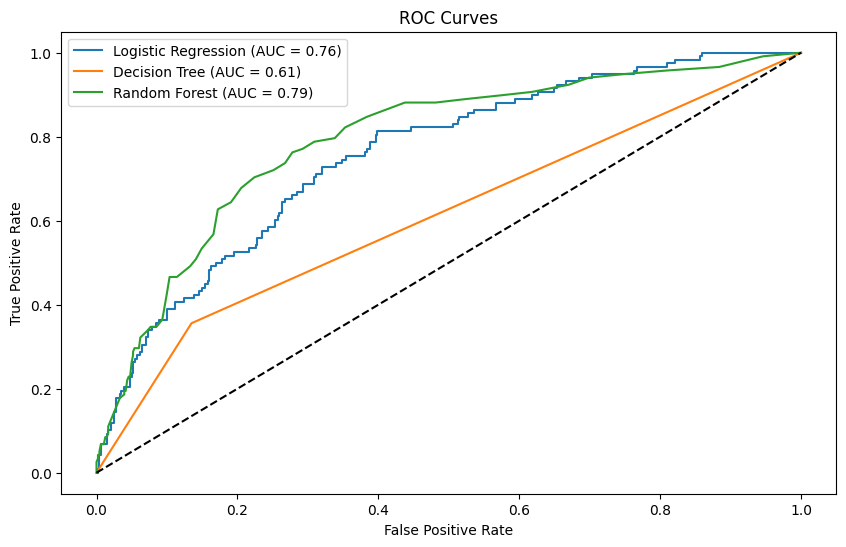

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_decision_tree, tpr_decision_tree, label=f'Decision Tree (AUC = {roc_auc_decision_tree:.2f})')
plt.plot(fpr_random_forest, tpr_random_forest, label=f'Random Forest (AUC = {roc_auc_random_forest:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()